In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv("train.csv")
# df

In [2]:
with open("train.csv") as f:
    columns = f.readline().strip().split(",")
    lst = []
    for i in range(1000000):
        if i%5 == 0:
            lst.append(f.readline().strip().split(","))
        else:
            f.readline()


In [10]:
{x:'' for x in columns}

{'id': '',
 'Gender': '',
 'Age': '',
 'Driving_License': '',
 'Region_Code': '',
 'Previously_Insured': '',
 'Vehicle_Age': '',
 'Vehicle_Damage': '',
 'Annual_Premium': '',
 'Policy_Sales_Channel': '',
 'Vintage': '',
 'Response': ''}

In [40]:
dtype = {
 'id':int,
 'Gender': str,
 'Age': int,
 'Driving_License': int,
 'Region_Code': float,
 'Previously_Insured': int,
 'Vehicle_Age': object,
 'Vehicle_Damage': str,
 'Annual_Premium': float,
 'Policy_Sales_Channel': float,
 'Vintage': int,
 'Response': int
}

In [41]:
df = pd.DataFrame(lst,columns=columns ).astype(dtype).set_index("id")
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
5,Female,31,1,47.0,1,< 1 Year,No,28150.0,152.0,197,0
10,Male,22,1,3.0,1,< 1 Year,No,27996.0,152.0,215,0
15,Male,79,1,8.0,0,> 2 Years,Yes,66887.0,124.0,150,0
20,Female,34,1,50.0,1,1-2 Year,No,2630.0,8.0,169,0
...,...,...,...,...,...,...,...,...,...,...,...
999975,Female,40,1,8.0,0,1-2 Year,Yes,32493.0,26.0,298,1
999980,Female,48,1,15.0,1,1-2 Year,No,2630.0,30.0,103,0
999985,Male,23,1,46.0,1,< 1 Year,No,22167.0,152.0,263,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 999995
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  object 
 1   Age                   200000 non-null  int64  
 2   Driving_License       200000 non-null  int64  
 3   Region_Code           200000 non-null  float64
 4   Previously_Insured    200000 non-null  int64  
 5   Vehicle_Age           200000 non-null  object 
 6   Vehicle_Damage        200000 non-null  object 
 7   Annual_Premium        200000 non-null  float64
 8   Policy_Sales_Channel  200000 non-null  float64
 9   Vintage               200000 non-null  int64  
 10  Response              200000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.3+ MB


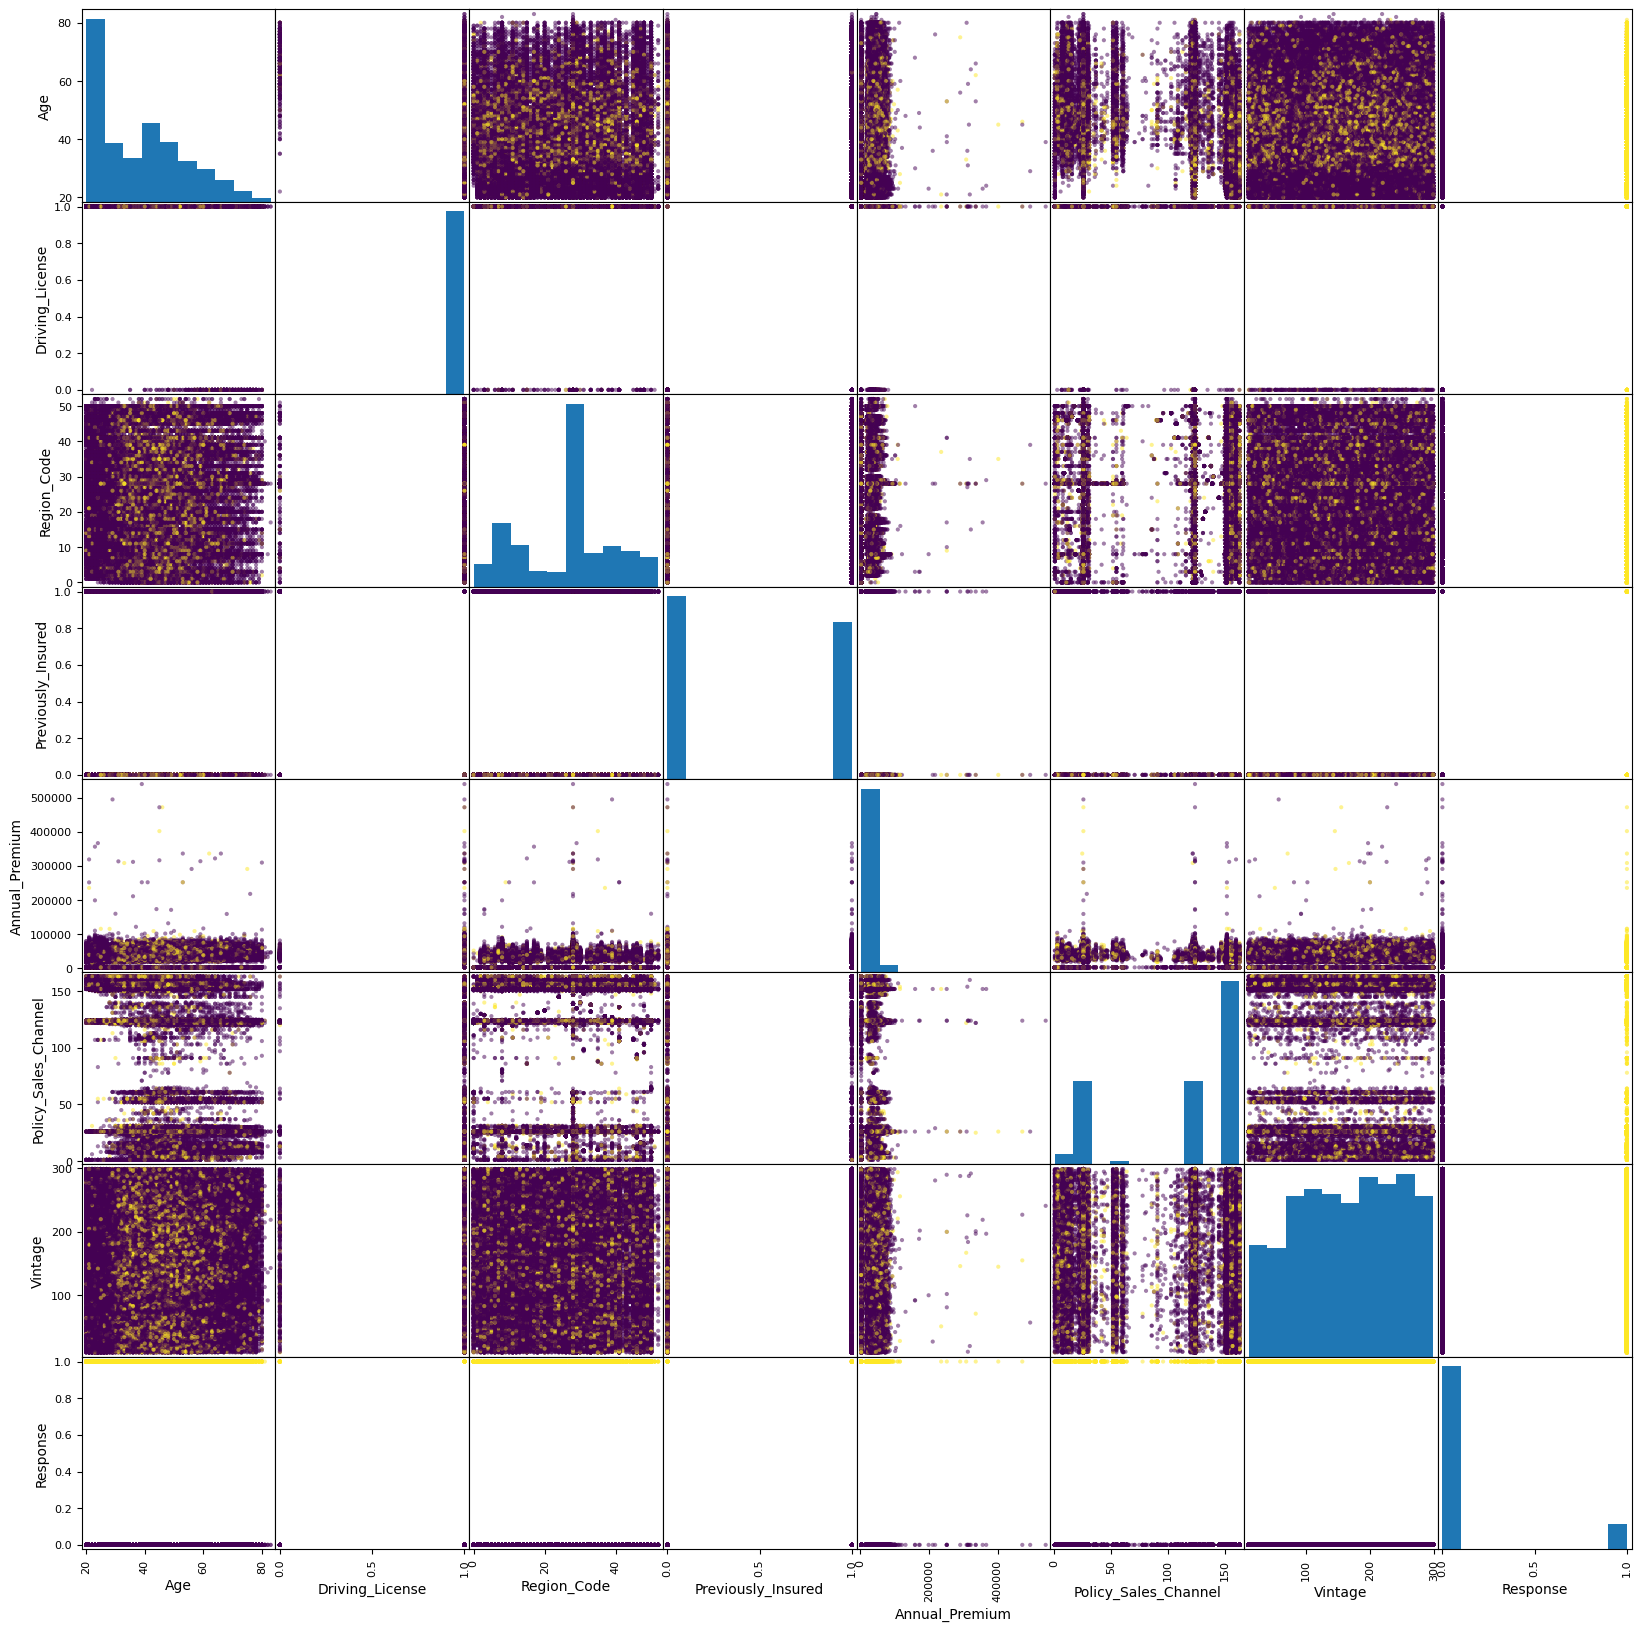

In [37]:
pd.plotting.scatter_matrix(df,figsize=(20,20),c=df['Response'])
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 999995
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  object 
 1   Age                   200000 non-null  int64  
 2   Driving_License       200000 non-null  int64  
 3   Region_Code           200000 non-null  float64
 4   Previously_Insured    200000 non-null  int64  
 5   Vehicle_Age           200000 non-null  object 
 6   Vehicle_Damage        200000 non-null  object 
 7   Annual_Premium        200000 non-null  float64
 8   Policy_Sales_Channel  200000 non-null  float64
 9   Vintage               200000 non-null  int64  
 10  Response              200000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.3+ MB


In [44]:
df_encoded = pd.get_dummies(df, columns=['Gender','Vehicle_Age','Vehicle_Damage'],drop_first=True,dtype=int)
df_encoded

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
id,,,,,,,,,,,,
0,21,1,35.0,0,65101.0,124.0,187,0,1,0,0,1
5,31,1,47.0,1,28150.0,152.0,197,0,0,1,0,0
10,22,1,3.0,1,27996.0,152.0,215,0,1,1,0,0
15,79,1,8.0,0,66887.0,124.0,150,0,1,0,1,1
20,34,1,50.0,1,2630.0,8.0,169,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999975,40,1,8.0,0,32493.0,26.0,298,1,0,0,0,1
999980,48,1,15.0,1,2630.0,30.0,103,0,0,0,0,0
999985,23,1,46.0,1,22167.0,152.0,263,0,1,1,0,0


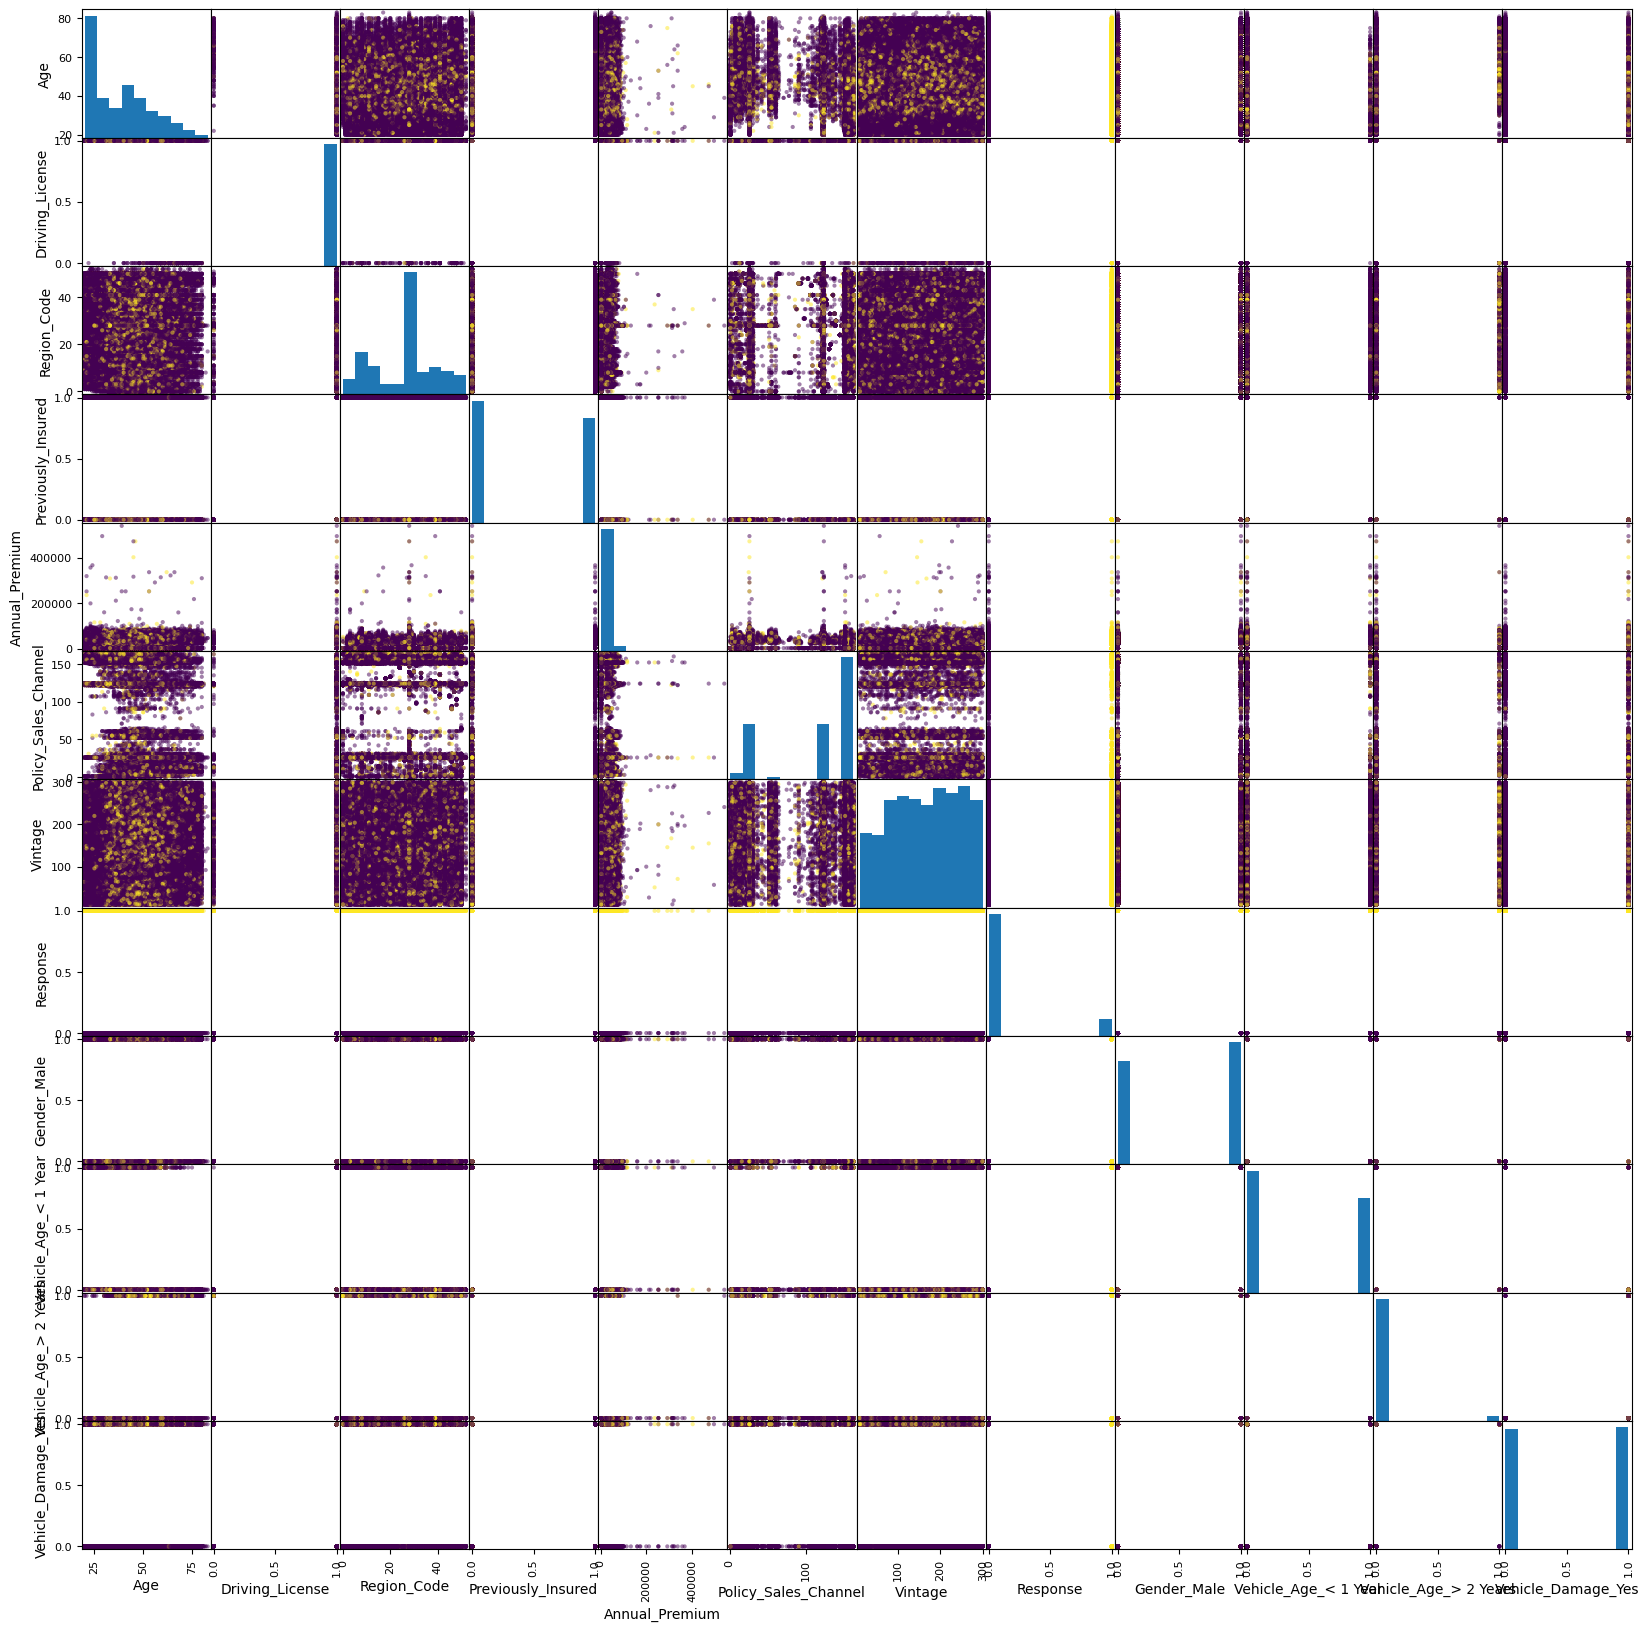

In [49]:
pd.plotting.scatter_matrix(df_encoded,figsize=(20,20),c=df['Response'])
plt.show()

In [51]:
df_encoded.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [53]:
X = df_encoded[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes']]
y = df_encoded['Response']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [55]:
cls = RandomForestClassifier()

cls.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
cls.predict_proba(X_train)

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [57]:
cls.predict(X_train)
# roc_auc_score()

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
roc_auc_score(y_test,cls.predict_proba(X_test)[:,1])

0.844223992139584

In [67]:
zip)cls.feature_importances_

array([0.15706741, 0.00046825, 0.11147285, 0.04744332, 0.23996268,
       0.06874976, 0.25991401, 0.01445321, 0.01779822, 0.00608782,
       0.07658247])

array(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'], dtype=object)